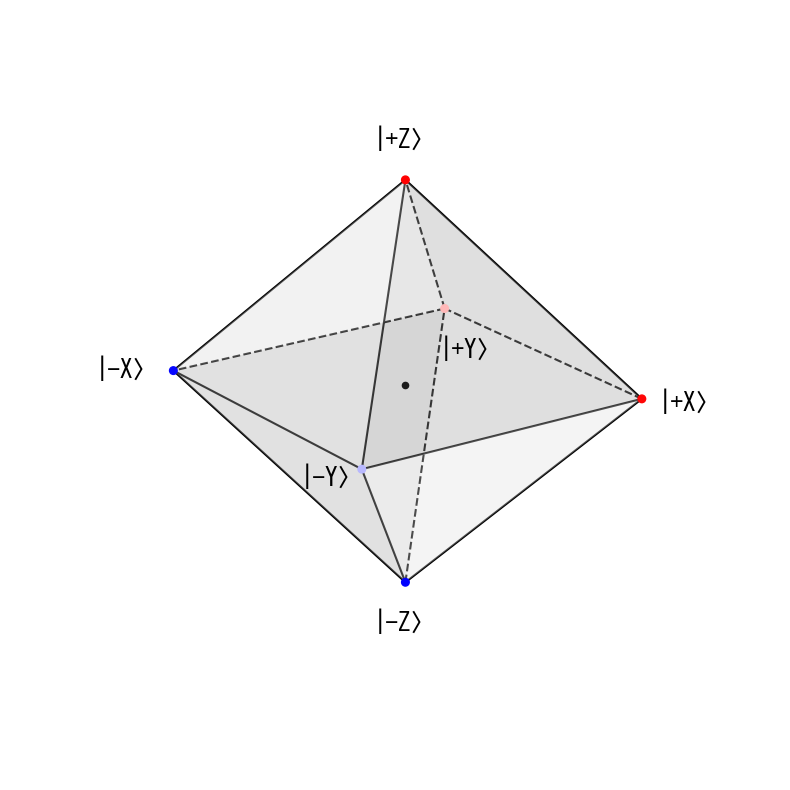

In [20]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource


def plot_polyhedron(ax):
    # 正八面体の情報
    VERTEX = np.array(
        [
            [0.0, 0.0, 1.2],
            [1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0],
            [-1.0, 0.0, 0.0],
            [-0.0, -1.0, 0.0],
            [0.0, -0.0, -1.2],
        ]
    )
    FACET = np.array(
        [
            [2, 0, 1],
            [3, 0, 2],
            [4, 0, 3],
            [4, 1, 0],
            [5, 1, 4],
            [5, 2, 1],
            [5, 3, 2],
            [5, 4, 3],
        ]
    )
    EDGE = np.array(
        [
            [0, 1],
            [1, 2],
            [2, 0],
            [2, 3],
            [3, 0],
            [3, 4],
            [4, 0],
            [4, 1],
            [4, 5],
            [5, 1],
            [5, 2],
            [5, 3],
        ]
    )

    for i in range(len(EDGE)):
        coordinates = np.array([VERTEX[EDGE[i][0]], VERTEX[EDGE[i][1]]])
        x, y, z = coordinates.T
        if y[0] + y[1] <= 0:
            ax.plot(x, y, z, markersize=6, color="black", linewidth=1.5)
        else:
            ax.plot(
                x, y, z, markersize=6, color="black", linewidth=1.5, linestyle="dashed"
            )

    ls = LightSource()
    for i in range(len(FACET)):
        coordinates = np.array(
            [VERTEX[FACET[i][0]], VERTEX[FACET[i][1]], VERTEX[FACET[i][2]]]
        )
        x, y, z = coordinates.T
        ax.plot_trisurf(
            x,
            y,
            z,
            alpha=0.2,
            antialiased=True,
            shade=True,
            lightsource=ls,
            color="#ffffff",
        )

    rho = np.array([1.4, 0.2, 1.2])

    ax.scatter(0, 0, 0, color="black", s=20)
    # ax.scatter(*rho, color="black", s=30)
    # ax.text(
    #     rho[0],
    #     rho[1],
    #     rho[2] + 0.2,
    #     "ρ",
    #     size=30,
    #     color="k",
    #     ha="center",
    #     va="center",
    #     font="meiryo",
    # )

    values = VERTEX @ rho
    values[np.abs(values) < 1.0] *= 2
    ax.scatter(
        VERTEX[:, 0], VERTEX[:, 1], VERTEX[:, 2], c=values, cmap="bwr", s=30, alpha=1.0
    )

    for v in VERTEX:
        if v[0] != 0:
            v2 = v * 1.2
            txt = "|" + ("+-"[int(v[0] < 0)]) + "X〉"
        elif v[1] != 0:
            v2 = v * 0.5
            v2[0] += v[1] * 0.2
            if v[1] == -1.0:
                v2[1] -= 0.6
                v2[0] += 0.1
            txt = "|" + ("+-"[int(v[1] < 0)]) + "Y〉"
        else:
            v2 = v * 1.2
            txt = "|" + ("+-"[int(v[2] < 0)]) + "Z〉"
        ax.text(
            v2[0],
            v2[1],
            v2[2],
            txt,
            size=18,
            color="k",
            ha="center",
            va="center",
            font="MS Gothic",
            zorder=100,
        )

    ax.set_axis_off()
    ax.view_init(elev=20, azim=-80)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)


fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection="3d")
plot_polyhedron(ax)
plt.tight_layout()
plt.savefig("3DImage.png", bbox_inches="tight", pad_inches=0.1, dpi=300)

In [21]:
from PIL import Image

img = Image.open("3DImage.png")
print(img.size)
# トリミング
img_trim = img.crop((280, 300, img.size[0] - 170, img.size[1] - 450))
# 保存
img_trim.save("3DImage.png", quality=95)

(2370, 2370)
